In [1]:
import sys
sys.path.append('../src_variable')

import network as nw
import torch
import generate_kvadraturen as gk
import bus
import road as rd
import traffic_lights as tl
import junction as jn
import numpy as np

In [2]:
network = gk.generate_minimal(150)

In [3]:
ids1 = ["road1", "road3"]
ids2 = ["road2", "road4"]
stops1 = [("road3", 25)]
stops2 = [("road4", 25)]
times1 = [1]
times2 = [1]

bus1 = bus.Bus(ids1, stops1, times1, network)
bus2 = bus.Bus(ids2, stops2, times2, network)

In [4]:
roads = network.roads
junctions = network.junctions
T = network.T
# Don't store the densities 
# bus_network = nw.RoadNetwork(roads, junctions, T, [bus_fw, bus_bw], store_densities = False)
bus_network = nw.RoadNetwork(roads, junctions, T, [bus1, bus2], store_densities = False)

In [5]:
j = bus_network.junctions[0]
for i in j.entering:
    print(j.roads[i].id)

road1
road2


In [7]:
print(bus_network.junctions[0].get_activation(0, "road1", "road3"))

(True, tensor(3.9754e-31, grad_fn=<AddBackward0>))


In [14]:
densities, queues, bus_lengths, bus_delays = bus_network.solve_cons_law()


-----------------------------------------
Controlpoint: 5.0
-----------------------------------------


-----------------------------------------
Controlpoint: 10.0
-----------------------------------------


-----------------------------------------
Controlpoint: 50.0
-----------------------------------------


-----------------------------------------
Controlpoint: 55.0
-----------------------------------------


-----------------------------------------
Controlpoint: 60.0
-----------------------------------------


-----------------------------------------
Controlpoint: 100.0
-----------------------------------------


-----------------------------------------
Controlpoint: 105.0
-----------------------------------------


-----------------------------------------
Controlpoint: 110.0
-----------------------------------------


-----------------------------------------
Controlpoint: 150
-----------------------------------------



In [15]:
print(bus_delays)

{0: [tensor(71.7556, grad_fn=<AddBackward0>)], 1: [tensor(6.3868, grad_fn=<AddBackward0>)]}


In [16]:
# objective = torch.tensor(0.0)
# for i in range(len(bus_delays)):
#     for j in range(len(bus_delays[i])):
#         objective = objective +  bus_delays[i][j]
objective = bus_delays[0][0]

In [17]:
objective.backward(retain_graph=True)

In [18]:
params = [v for road in bus_network.roads for v in road.Vmax] +\
        [t for junction in bus_network.junctions for traffic_light in junction.trafficlights for t in traffic_light.cycle] +\
        [t for junction in bus_network.junctions for traffic_light in junction.coupled_trafficlights for t in traffic_light.cycle]

In [19]:
for p in params:
    print(p.grad)

tensor(0.0143)
tensor(-0.0021)
tensor(-1.0684)
tensor(-1.2251)
tensor(1.2929e-22)
tensor(-0.1638)


In [1]:
def minimal_kvadraturen(T = 100):
    road1 = rd.Road(1, 50, 5, torch.tensor([50.0], requires_grad=True), [], left_pos=(-1, 0), right_pos=(0, 0),
                    inflow = 0.1, id="road1fw")
    road2 = rd.Road(1, 50, 5, torch.tensor([50.0], requires_grad=True), [], left_pos=(0, 0), right_pos=(1, 0),
                    inflow = 0.1, id="road1bw")
    road3 = rd.Road(1, 50, 5, torch.tensor([50.0], requires_grad=True), [], left_pos=(0, -1), right_pos=(0, 0),
                    inflow = 0.1, id="road2fw")
    road4 = rd.Road(1, 50, 5, torch.tensor([50.0], requires_grad=True), [], left_pos=(0, 0), right_pos=(0, 1),
                    inflow = 0.1, id="road2bw")
    traffic_light = tl.CoupledTrafficLightContinuous(False, [0], [1], [3], [2], [40.0, 30.0])
    junction = jn.Junction([road1, road2, road3, road4], [0,3], [1,2], [[1.0, 0.0],[0.0, 1.0]], [], [traffic_light])
    network = nw.RoadNetwork([road1, road2, road3, road4], [junction], T, optimizing = False)
    return network


In [3]:
# Testing minimal example
T = 100
network = minimal_kvadraturen(T)

ids = ["road1fw", "road1bw"]
stops = [("road1bw", 20)]
times = [20]

bus1 = bus.Bus(ids, stops, times, network)

bus_network = nw.RoadNetwork(network.roads, network.junctions, network.T, [bus1], optimizing = False, store_densities = False)

In [4]:
a = 1.9999998807907104
print(np.floor(a))
print(np.floor(a+1.0))

1.0
2.0


In [5]:
densities, queues, bus_lengths, bus_delays = bus_network.solve_cons_law()

c:\Users\torje\OneDrive - NTNU\Dokumenter\Semester10\master_project\notebooks\../src_variable\network.py:276: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dt = torch.tensor(controlpoint - t)


In [6]:
print(bus_lengths)

{0: {0: 0, tensor(0.6000, grad_fn=<AddBackward0>): tensor(8.3333, grad_fn=<AddBackward0>), tensor(1.2000, grad_fn=<AddBackward0>): tensor(16.6667, grad_fn=<AddBackward0>), tensor(1.8000, grad_fn=<AddBackward0>): tensor(24.6650, grad_fn=<AddBackward0>), tensor(2.4000, grad_fn=<AddBackward0>): tensor(32.8102, grad_fn=<AddBackward0>), tensor(3.0000, grad_fn=<AddBackward0>): tensor(40.8368, grad_fn=<AddBackward0>), tensor(3.6000, grad_fn=<AddBackward0>): tensor(48.9262, grad_fn=<AddBackward0>), tensor(4.2000, grad_fn=<AddBackward0>): tensor(50., grad_fn=<AddBackward0>), tensor(4.8000, grad_fn=<AddBackward0>): tensor(50., grad_fn=<AddBackward0>), tensor(5., grad_fn=<AddBackward0>): tensor(50., grad_fn=<AddBackward0>), tensor(5.6000, grad_fn=<AddBackward0>): tensor(50., grad_fn=<AddBackward0>), tensor(6.2000, grad_fn=<AddBackward0>): tensor(50., grad_fn=<AddBackward0>), tensor(6.8000, grad_fn=<AddBackward0>): tensor(50., grad_fn=<AddBackward0>), tensor(7.4000, grad_fn=<AddBackward0>): tensor

In [7]:
print(bus1.lengths)
print(bus1.stop_lengths)


[50, 50]
[70, 200]


In [6]:
t_list = np.linspace(0, 200, 1000)
activation = np.zeros_like(t_list)
for junction in bus_network.junctions:
    for i, t in enumerate(t_list):
        # print(f"t = {t}, activation = {junction.get_activation(t, 'road1fw', 'road1bw')}")
        _, activation[i] = junction.get_activation(t, 'road1fw', 'road1bw')

In [7]:
objective = bus_delays[0][0]
print(objective)

tensor(32.1900, grad_fn=<MaximumBackward0>)


In [8]:
params = [v for road in bus_network.roads for v in road.Vmax] +\
        [t for junction in bus_network.junctions for traffic_light in junction.trafficlights for t in traffic_light.cycle] +\
        [t for junction in bus_network.junctions for traffic_light in junction.coupled_trafficlights for t in traffic_light.cycle]

In [9]:
objective.backward()

In [10]:
for p in params:
    print(p.grad)

tensor(-0.9826)
tensor(-2.6162)
tensor(-0.4003)
tensor(-0.0975)
tensor(1.4933e-18)
tensor(-0.1184)


In [11]:
prr

NameError: name 'prr' is not defined

In [10]:
import matplotlib.pyplot as plt
plt.plot(t_list, activation)

NameError: name 't_list' is not defined

In [8]:
lengths = []
times = list(bus_lengths[0].keys())
times_list = []
for t in times:
    lengths.append(float(bus_lengths[0][t]))
    times_list.append(float(t))

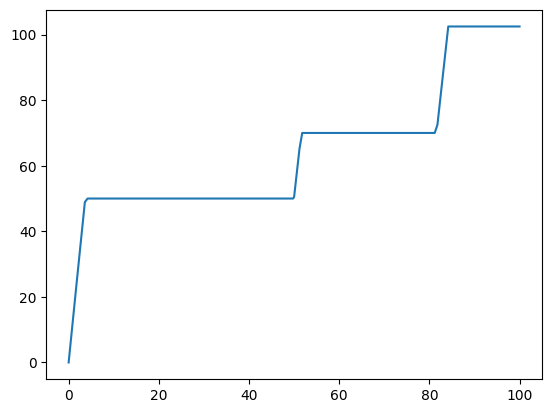

In [11]:
plt.plot(times_list, lengths)


In [ ]:
prrr

NameError: name 'prrr' is not defined

In [2]:
torch.autograd.set_detect_anomaly(True)

In [59]:
T = 200
network = gk.generate_kvadraturen_small(T)

ids_bw = ["lundsbro_bw", "elvegata_bw", "tollbod_6bw", "tollbod_5bw", "tollbod_4bw", 
        "tollbod_3bw", "tollbod_2bw", "tollbod_1bw", "v_strand_7bw", "v_strand_6bw",
            "v_strand_5bw", "v_strand_4bw", "v_strand_3bw", "v_strand_2bw", "v_strand_1bw"]            
            

stops_bw = [("tollbod_6bw", 50), ("tollbod_3bw", 90), ("tollbod_1bw", 30), ("v_strand_3bw", 25)]
times_bw = [40, 130, 190, 250]
bus_bw = bus.Bus(ids_bw, stops_bw, times_bw, network)

ids_fw = ["v_strand_1fw", "v_strand_2fw", "v_strand_3fw", "h_w_2", "h_w_3",
    "h_w_4", "festning_4fw", "festning_5fw", "festning_6fw", "festning_7fw",
    "tollbod_4fw", "tollbod_5fw", "tollbod_6fw", "elvegata_fw", "lundsbro_fw"]

stops_fw = [("v_strand_1fw", 40), ("h_w_3", 30), ("festning_5fw", 40), ("tollbod_4fw", 25), 
            ("tollbod_6fw", 60)]
times_fw = [1, 30, 110, 130, 230]
bus_fw = bus.Bus(ids_fw, stops_fw, times_fw, network)

In [60]:
# Create actual network
roads = network.roads
junctions = network.junctions
T = network.T
# Don't store the densities 
bus_network = nw.RoadNetwork(roads, junctions, T, [bus_fw, bus_bw], store_densities = False)

In [61]:
densities, queues, bus_lengths, bus_delays = bus_network.solve_cons_law()

In [62]:
print(bus_delays)

{0: [tensor(2.5116, grad_fn=<MaximumBackward0>), tensor(29.6944, grad_fn=<MaximumBackward0>), tensor(9.3916, grad_fn=<MaximumBackward0>), tensor(66.6754, grad_fn=<MaximumBackward0>), tensor(0.)], 1: [tensor(0., grad_fn=<MaximumBackward0>), tensor(0., grad_fn=<MaximumBackward0>), tensor(0., grad_fn=<MaximumBackward0>), tensor(0.)]}


In [63]:
# Cloning just to be safe
objective = bus_delays[0][0].clone() #+ bus_delays[1][0].clone()
for i in range(2):
    for j in range(len(bus_delays[i])):
        if i == 0 and j == 0:
            continue
        objective = objective + bus_delays[i][j].clone()

In [64]:
print(objective)

tensor(108.2730, grad_fn=<AddBackward0>)


In [65]:
params = [v for road in bus_network.roads for v in road.Vmax] +\
        [t for junction in bus_network.junctions for traffic_light in junction.trafficlights for t in traffic_light.cycle] +\
        [t for junction in bus_network.junctions for traffic_light in junction.coupled_trafficlights for t in traffic_light.cycle]

In [66]:
print(params)

[tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(13.8889, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.3333, requires_grad=True), tensor(8.33

In [67]:
objective.backward()

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [2]], which is output 0 of AsStridedBackward0, is at version 5; expected version 4 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

In [ ]:
print("Road Vmax gradients:")
for road in bus_network.roads:
    for v in road.Vmax:
        print(v.grad)

Road Vmax gradients:
tensor(-0.9294)
tensor(-0.7419)
tensor(-0.8887)
tensor(-0.0036)
tensor(2.4498e-09)
tensor(2.4587e-09)
tensor(-4.3892e-08)
tensor(-1.1942e-06)
tensor(-1.4293e-07)
tensor(1.0852e-08)
tensor(7.7913e-08)
tensor(-4.4200e-05)
tensor(-2.3549e-05)
tensor(-1.6591e-05)
tensor(-1.4322e-05)
tensor(-5.6465e-06)
tensor(0.6656)
tensor(-2.7338)
tensor(-1.6761)
tensor(-0.9272)
tensor(-5.9522e-07)
tensor(-5.8069e-07)
tensor(-6.0048e-07)
tensor(1.4817e-31)
tensor(1.3082e-31)
tensor(1.3095e-31)
tensor(8.6204e-22)
tensor(1.9210e-21)
tensor(1.9031e-21)
tensor(-3.2281e-07)
tensor(9.9211e-22)
tensor(-6.1136e-05)
tensor(-0.0002)
tensor(-0.0005)
tensor(-0.0012)
tensor(-0.0028)
tensor(-0.0052)
tensor(0.0003)
tensor(0.0006)
tensor(1.9539e-05)
tensor(8.4268e-06)
tensor(4.9290e-06)
tensor(-0.0242)
tensor(1.7927e-08)
tensor(0.0013)
tensor(0.0026)
tensor(-0.2725)
tensor(-0.2010)
tensor(0.0055)
tensor(0.0111)
tensor(0.0221)
tensor(0.0020)
tensor(0.0462)
tensor(0.0344)
tensor(0.0267)
tensor(0.2626)

In [12]:
for junction in bus_network.junctions:
    for traffic_light in junction.trafficlights:
        for t in traffic_light.cycle:
            print(t.grad)

    for traffic_light in junction.coupled_trafficlights:
        for t in traffic_light.cycle:
            print(t.grad)

tensor(-6.0415e-08)
tensor(0.)
tensor(8.1188e-24)
tensor(0.)
tensor(-4.2002e-40)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(-4.6191e-29)
tensor(0.)
tensor(-3.2474e-23)
tensor(0.)
tensor(1.1729e-20)
tensor(0.)
tensor(-4.6191e-29)
tensor(0.)
tensor(-4.7772e-30)
tensor(0.)
tensor(4.4770e-18)
tensor(0.)
tensor(1.8117e-17)
tensor(0.)
tensor(1.8117e-17)
tensor(0.)


In [ ]:
for p in params:
    print(p.grad)

tensor(-2.4659e-15)
tensor(-3.9577e-12)
tensor(-3.9602e-12)
tensor(-7.9203e-12)
tensor(-1.5841e-11)
tensor(-3.1681e-11)
tensor(-6.3363e-11)
tensor(-1.2673e-10)
tensor(-2.5345e-10)
tensor(-5.0690e-10)
tensor(-1.0138e-09)
tensor(-2.0276e-09)
tensor(-4.0552e-09)
tensor(-8.1104e-09)
tensor(-1.6221e-08)
tensor(-3.2442e-08)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(-1.7360)
tensor(-1.4400)
tensor(-0.8480)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(-6.4883e-08)
tensor(-1.2977e-07)
tensor(-2.5953e-07)
tensor(-5.1907e-07)
tensor(-1.0381e-06)
tensor(-2.0763e-06)
tensor(-4.1525e-06)
tensor(-8.3051e-06)
tensor(-1.6610e-05)
tensor(-3.3220e-05)
tensor(-6.6441e-05)
tensor(-0.0001)
tensor(-3.3096e-07)
tensor(-0.0003)
tensor(-0.0005)
tensor(-0.0011)
tensor(-5.2954e-06)
tensor(-0.0021)
tensor(-0.0523)
tensor(-0.0085)
tensor(-0.0171)
tensor(-0.0341)
tensor(-0.0683)
tensor(-0.1366)
tensor(-2.1185)
tensor(-0.4109)
tensor(-0.8217)
tensor(-1.6435)


In [ ]:
derivative,_ = torch.autograd.grad(objective, params[0], allow_unused=True, retain_graph=True)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
print(derivative)

(tensor(-1.2329e-15),)
